# Analysing Brazil - Life Expectancy versus GDP

Getting the data
Initiallly, three datasets of the World Bank are considered. From there we took Brazil's data for all included years.
- One dataset, available at http://data.worldbank.org/indicator/NY.GDP.MKTP.CD, lists the GDP of the world's countries in current US dollars, for various years.
- The other dataset, available at http://data.worldbank.org/indicator/SP.DYN.LE00.IN, lists the life expectancy of the world's countries.
- The last one: https://data.worldbank.org/indicator/SP.POP.TOTL, lists the population.

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
from pandas_datareader.wb import download

%matplotlib inline

In [2]:
# Function to return rounded values in 'thousants'
def roundTo1000 (value):
    return round(value/1000)

In [3]:
# Function to return rounded values in millions
def roundToMillions (value):
    return round(value / 1000000)

In [4]:
# Download World Bank Population indicator
INDICATOR = 'SP.POP.TOTL'
START_YEAR = 1960
END_YEAR = 2016
COUNTRY = 'BRA'

popBr = download(indicator=INDICATOR, country=COUNTRY, start=START_YEAR, end=END_YEAR)
popBr.shape # (57, 1)

(57, 1)

In [5]:
popBr.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 57 entries, (Brazil, 2016) to (Brazil, 1960)
Data columns (total 1 columns):
SP.POP.TOTL    57 non-null int64
dtypes: int64(1)
memory usage: 1.1+ KB


In [6]:
# Download World Bank GDP indicator
INDICATOR = 'NY.GDP.MKTP.CD'
START_YEAR = 1960
END_YEAR = 2016
COUNTRY = 'BRA'

gdpBr = download(indicator=INDICATOR, country=COUNTRY, start=START_YEAR, end=END_YEAR)
gdpBr.shape # (57, 1)

(57, 1)

In [7]:
gdpBr.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 57 entries, (Brazil, 2016) to (Brazil, 1960)
Data columns (total 1 columns):
NY.GDP.MKTP.CD    57 non-null float64
dtypes: float64(1)
memory usage: 1.1+ KB


In [8]:
# Download World Bank Life Expectance indicator
INDICATOR = 'SP.DYN.LE00.IN'
START_YEAR = 1960
END_YEAR = 2016
COUNTRY = 'BRA'

lifeBr = download(indicator=INDICATOR, country=COUNTRY, start=START_YEAR, end=END_YEAR)
lifeBr.shape # (57, 1)

(57, 1)

In [9]:
lifeBr.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 57 entries, (Brazil, 2016) to (Brazil, 1960)
Data columns (total 1 columns):
SP.DYN.LE00.IN    57 non-null float64
dtypes: float64(1)
memory usage: 1.1+ KB


In [10]:
# Transforming
popBr['popTot(1000)'] = popBr['SP.POP.TOTL'].apply(roundTo1000)  
gdpBr['gdpTot(USDm)'] = gdpBr['NY.GDP.MKTP.CD'].apply(roundToMillions) 
lifeBr['lifeExp(years)'] = lifeBr['SP.DYN.LE00.IN'].apply(round) 

In [11]:
popBr = popBr.reset_index()
gdpBr = gdpBr.reset_index()
lifeBr = lifeBr.reset_index()

In [12]:
dataBr = merge(popBr, gdpBr)

In [13]:
dataBr = merge(dataBr, lifeBr)

In [14]:
dataBr.head()

,country,year,SP.POP.TOTL,popTot(1000),NY.GDP.MKTP.CD,gdpTot(USDm),SP.DYN.LE00.IN,lifeExp(years)
0,Brazil,2016,207652865,207653,1.796187e+12,1796187,75.509,76
1,Brazil,2015,205962108,205962,1.803653e+12,1803653,75.284,75
2,Brazil,2014,204213133,204213,2.455993e+12,2455993,75.042,75
3,Brazil,2013,202408632,202409,2.472807e+12,2472807,74.777,75
4,Brazil,2012,200560983,200561,2.465189e+12,2465189,74.488,74


In [15]:
dataBr = dataBr[['year', 'popTot(1000)', 'gdpTot(USDm)', 'lifeExp(years)']]

In [16]:
dataBr.head()

,year,popTot(1000),gdpTot(USDm),lifeExp(years)
0,2016,207653,1796187,76
1,2015,205962,1803653,75
2,2014,204213,2455993,75
3,2013,202409,2472807,75
4,2012,200561,2465189,74


In [17]:
dataBr['gdpPc(USD)'] = ((dataBr['gdpTot(USDm)'] / dataBr['popTot(1000)']) *1000).apply(round)

In [18]:
dataBr.tail()

,year,popTot(1000),gdpTot(USDm),lifeExp(years),gdpPc(USD)
52,1964,81169,21212,56,261
53,1963,78854,23021,56,292
54,1962,76573,19926,55,260
55,1961,74352,15237,55,205
56,1960,72208,15166,54,210


In [26]:
YEAR = 'year'
POP = 'popTot(1000)'
GDP = 'gdpTot(USDm)'
GDP_PC = 'gdpPc(USD)'
LIFE ='lifeExp(years)'

In [20]:
dataBr = dataBr.sort_values(YEAR)

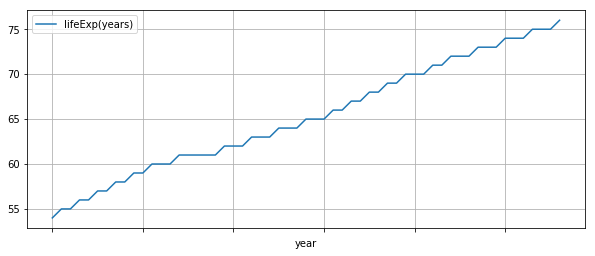

In [21]:
dataBr.plot(x=YEAR, y=LIFE, kind='line', grid=True, logx=False, figsize = (10, 4))

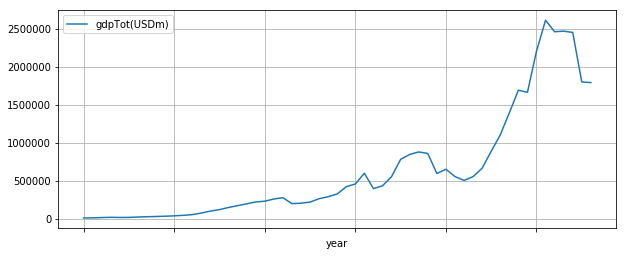

In [22]:
dataBr.plot(x=YEAR, y=GDP, kind='line', grid=True, logy=False, figsize = (10, 4))

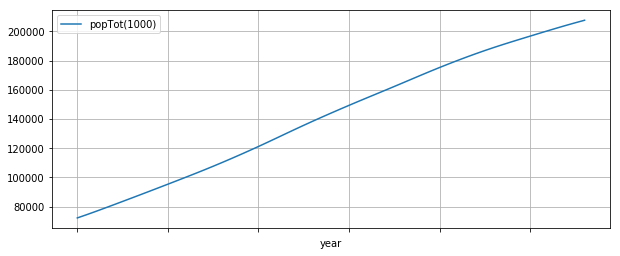

In [23]:
dataBr.plot(x=YEAR, y=POP, kind='line', grid=True, logy=False, figsize = (10, 4))

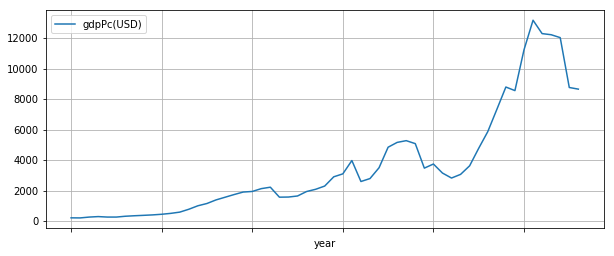

In [27]:
dataBr.plot(x=YEAR, y=GDP_PC, kind='line', grid=True, logy=False, figsize = (10, 4))

In [24]:
from scipy.stats import spearmanr

dataA = dataBr[GDP]
dataB = dataBr[LIFE]
(correlation, pValue) = spearmanr(dataA, dataB)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.9804684950090623
It is statistically significant.


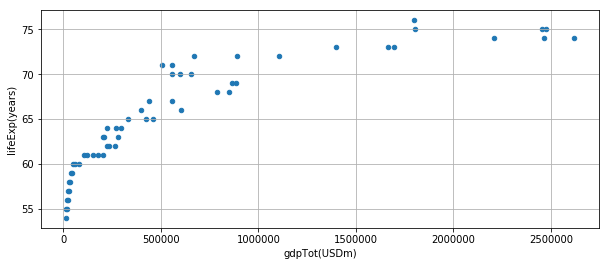

In [28]:
dataBr.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=False, figsize = (10, 4))

## Conclusion

There is a total correlation between the GDP Growth and a higher poplulation Life expectancy - More money, more years to live!